In [1]:
import sys
from pathlib import Path
import os

# Get project root (parent of notebooks/)
PROJECT_ROOT = Path.cwd().parent.resolve()

# Add project root to Python path so src/ is importable
sys.path.insert(0, str(PROJECT_ROOT))

# Change working directory to project root
os.chdir(PROJECT_ROOT)

print("Project root set to:", PROJECT_ROOT)
print("Current working directory:", Path.cwd())

Project root set to: /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-multi-angle-model
Current working directory: /raven/ptmp/cwinkler/ML-models/beyond-stoner-wohlfarth/single-grain-multi-angle-model


## Beyond Stoner-Wohlfarth Single-grain multi angle model

### Data Pre-Processing

In [2]:
from scripts.analyze_magnetic_data import analyze_magnetic_data


Applying symmetry operations


Removing very small BHmax values


 Removing  76  datapoints out of  9914 points 


 Writting applied symmetries data for training into ./data/processed/ 

Shape of the DataFrame: (9838, 7)
No missing values in the DataFrame.
Basic statistics:
           Ms (A/m)       A (J/m)     K (J/m^3)      Hc (A/m)      Mr (A/m)  \
count  9.838000e+03  9.838000e+03  9.838000e+03  9.838000e+03  9.838000e+03   
mean   4.290971e+06  5.025679e-10  4.849508e+06  8.669455e+05  1.610952e+06   
std    2.103766e+06  2.828490e-10  2.902159e+06  1.096235e+06  1.417877e+06   
min    4.074314e+04  3.770118e-13  3.087719e+02  8.005315e-01  6.365871e-04   
25%    2.517801e+06  2.567231e-10  2.315572e+06  1.533786e+05  5.054696e+05   
50%    4.286668e+06  4.995010e-10  4.814105e+06  4.666123e+05  1.178233e+06   
75%    6.076723e+06  7.453580e-10  7.366409e+06  1.142565e+06  2.353315e+06   
max    7.955488e+06  9.998231e-10  9.998651e+06  9.130162e+06  7.472977e+06   
range  7.9147

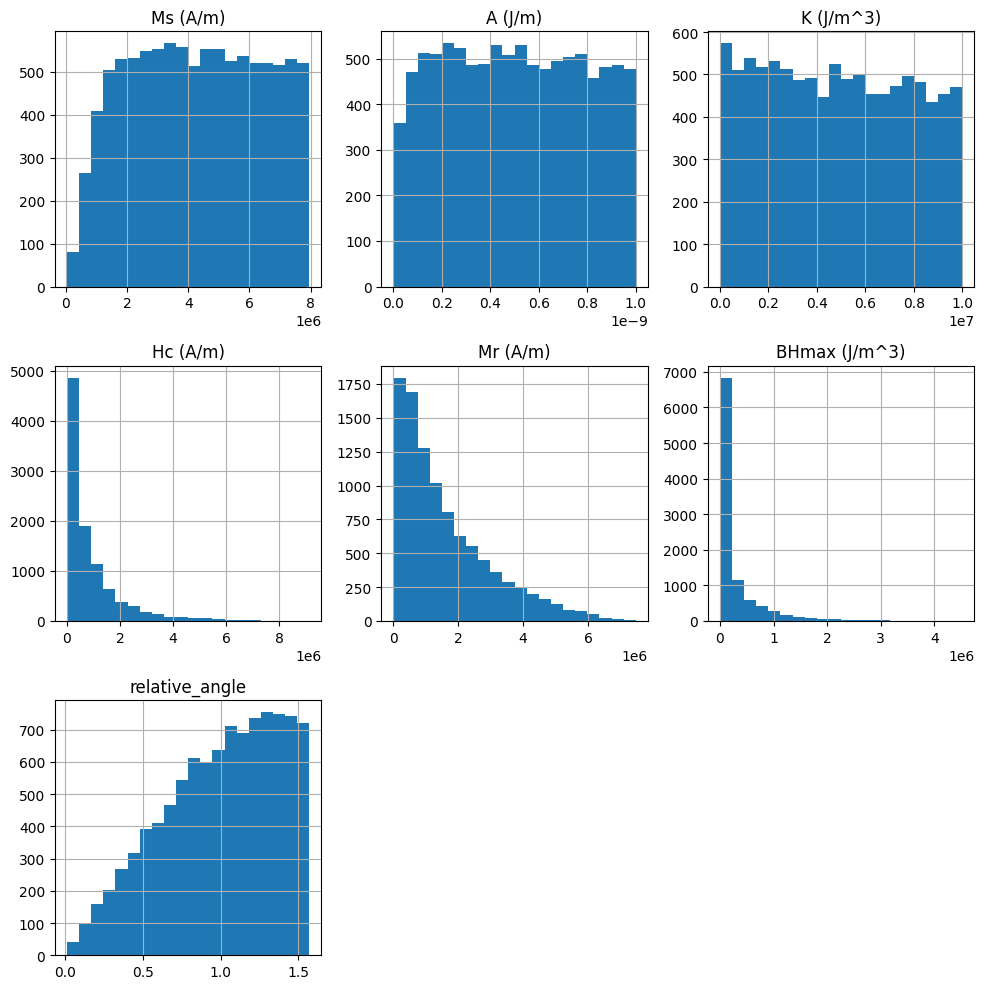

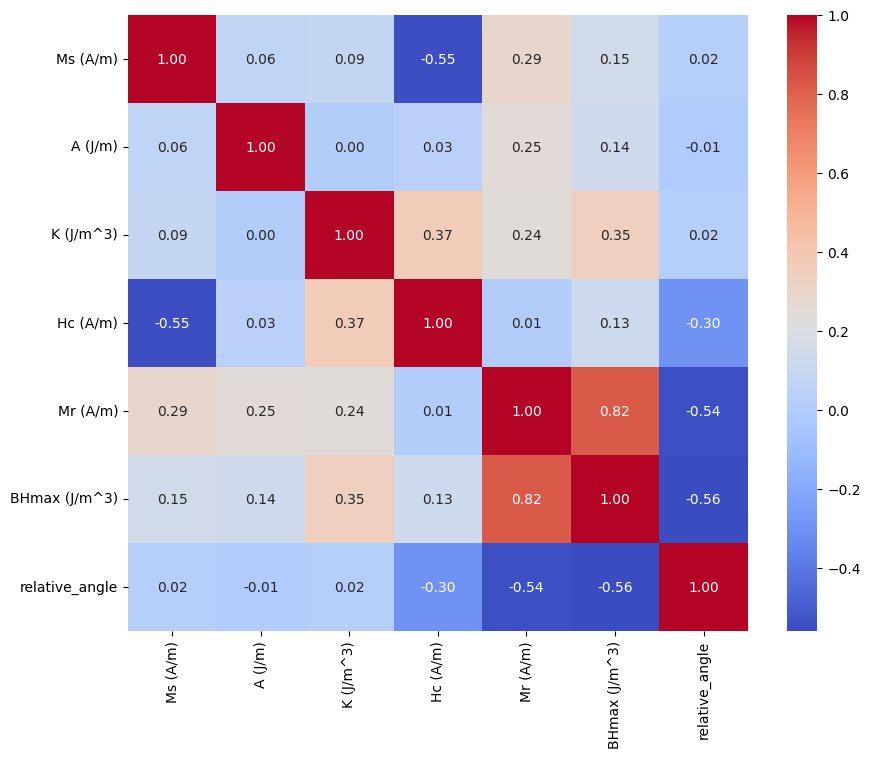

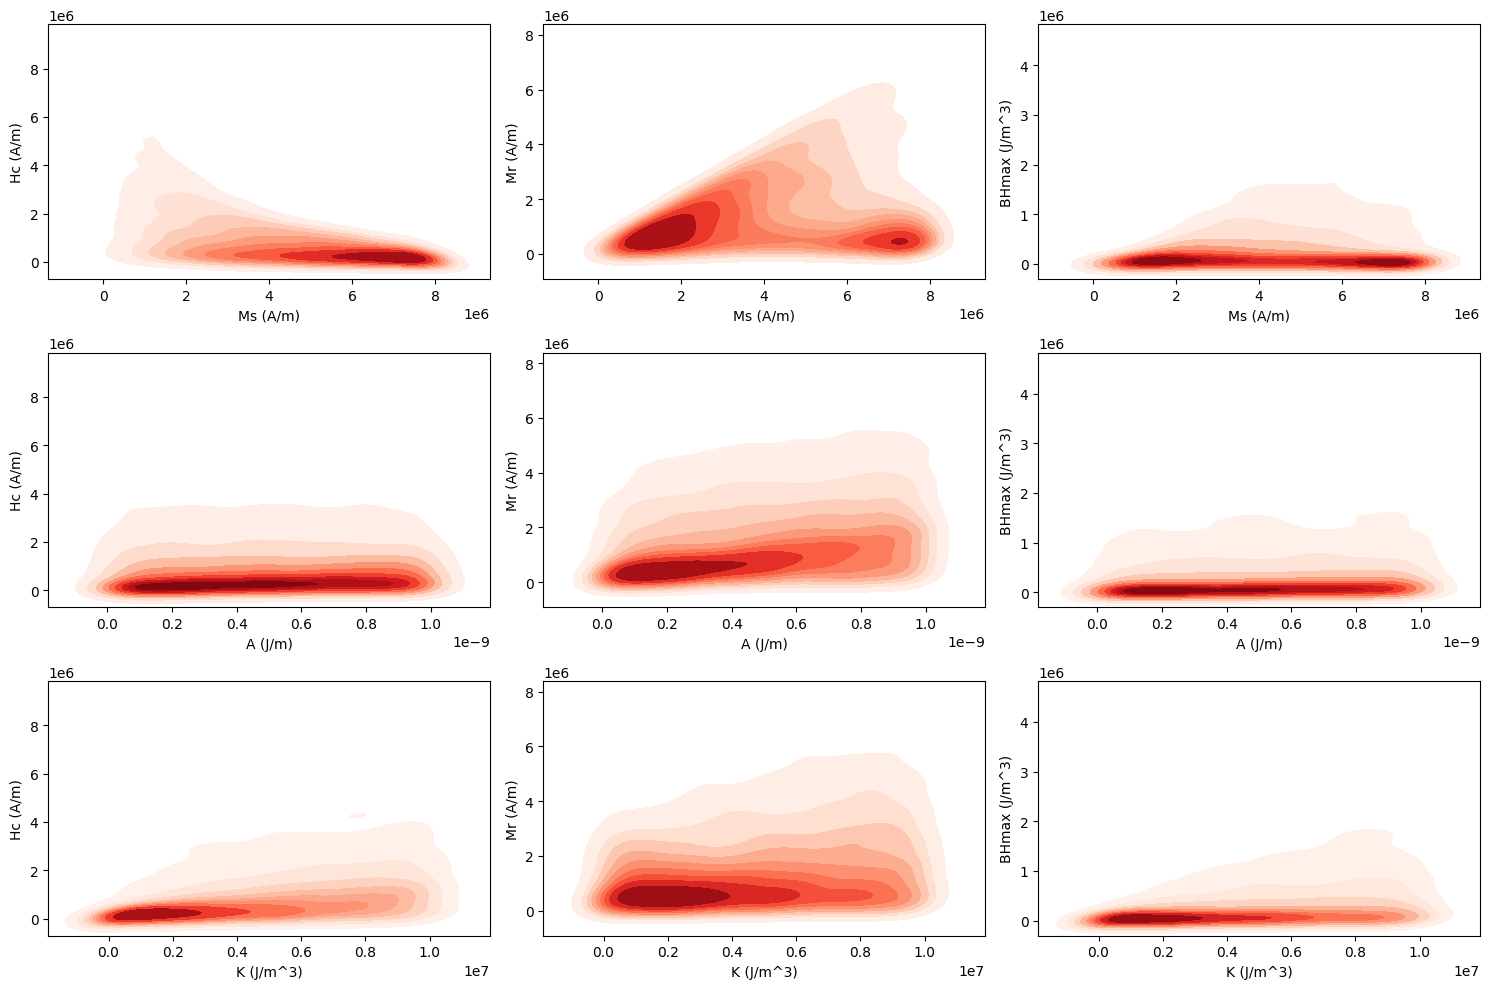

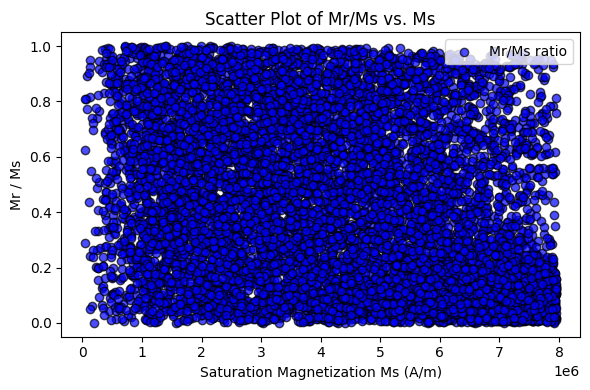

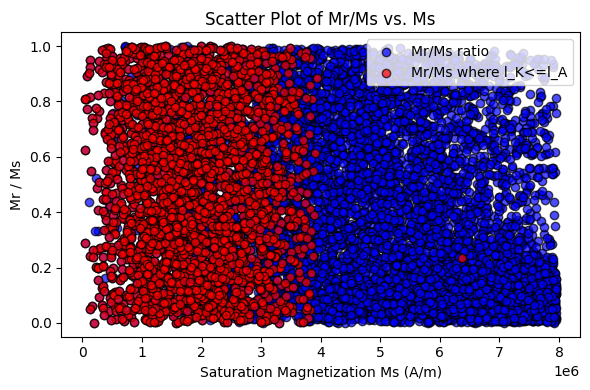

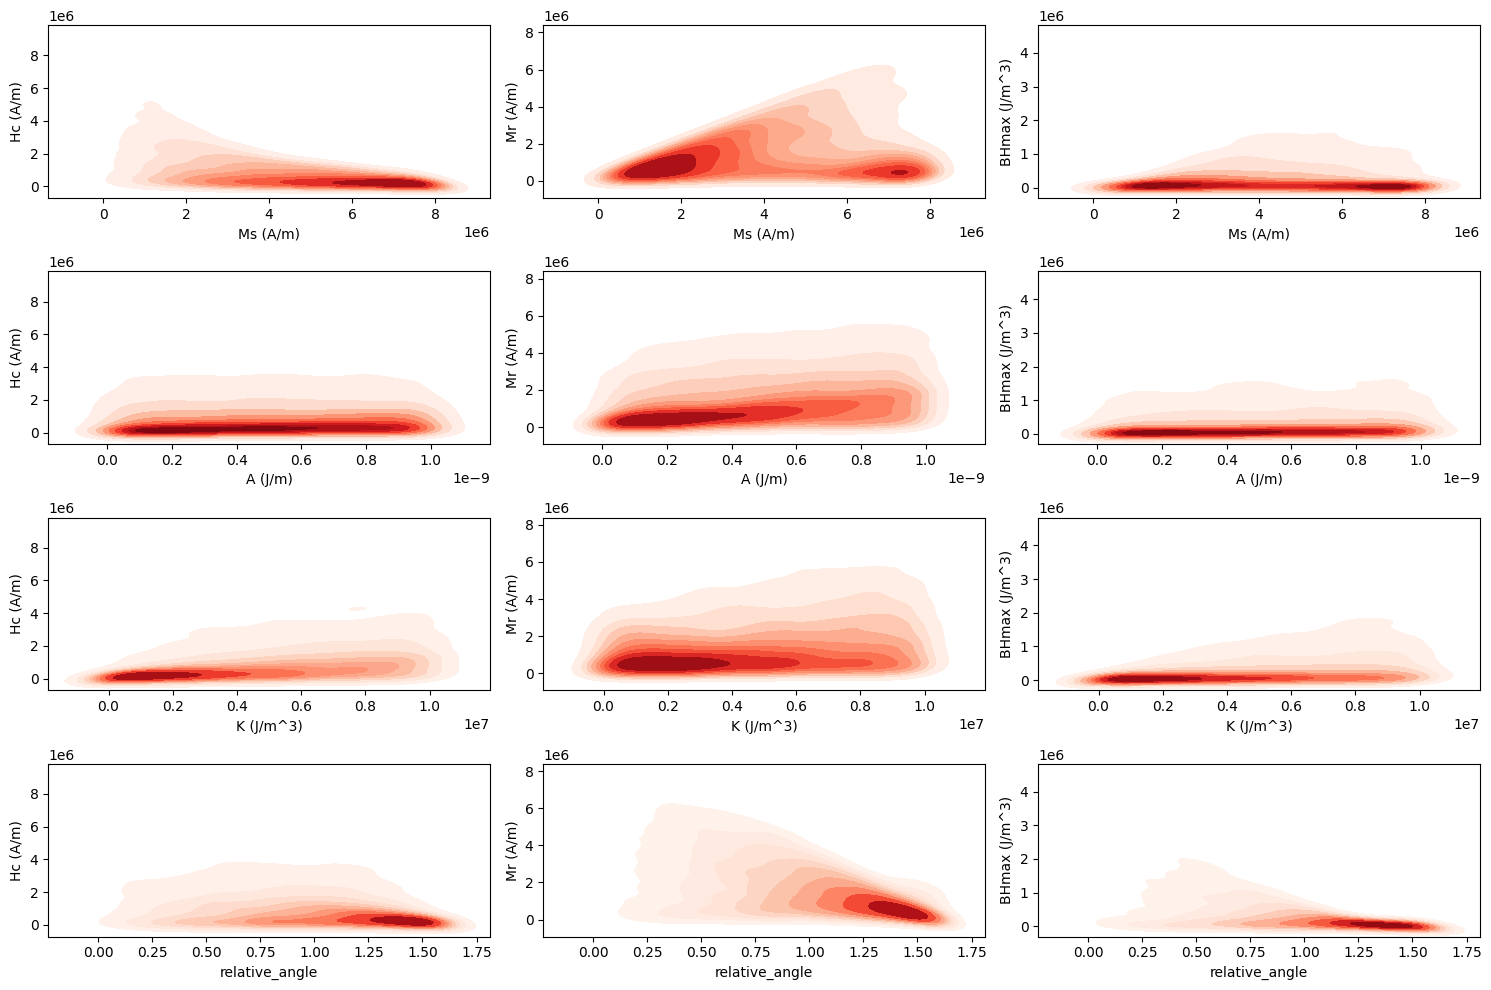

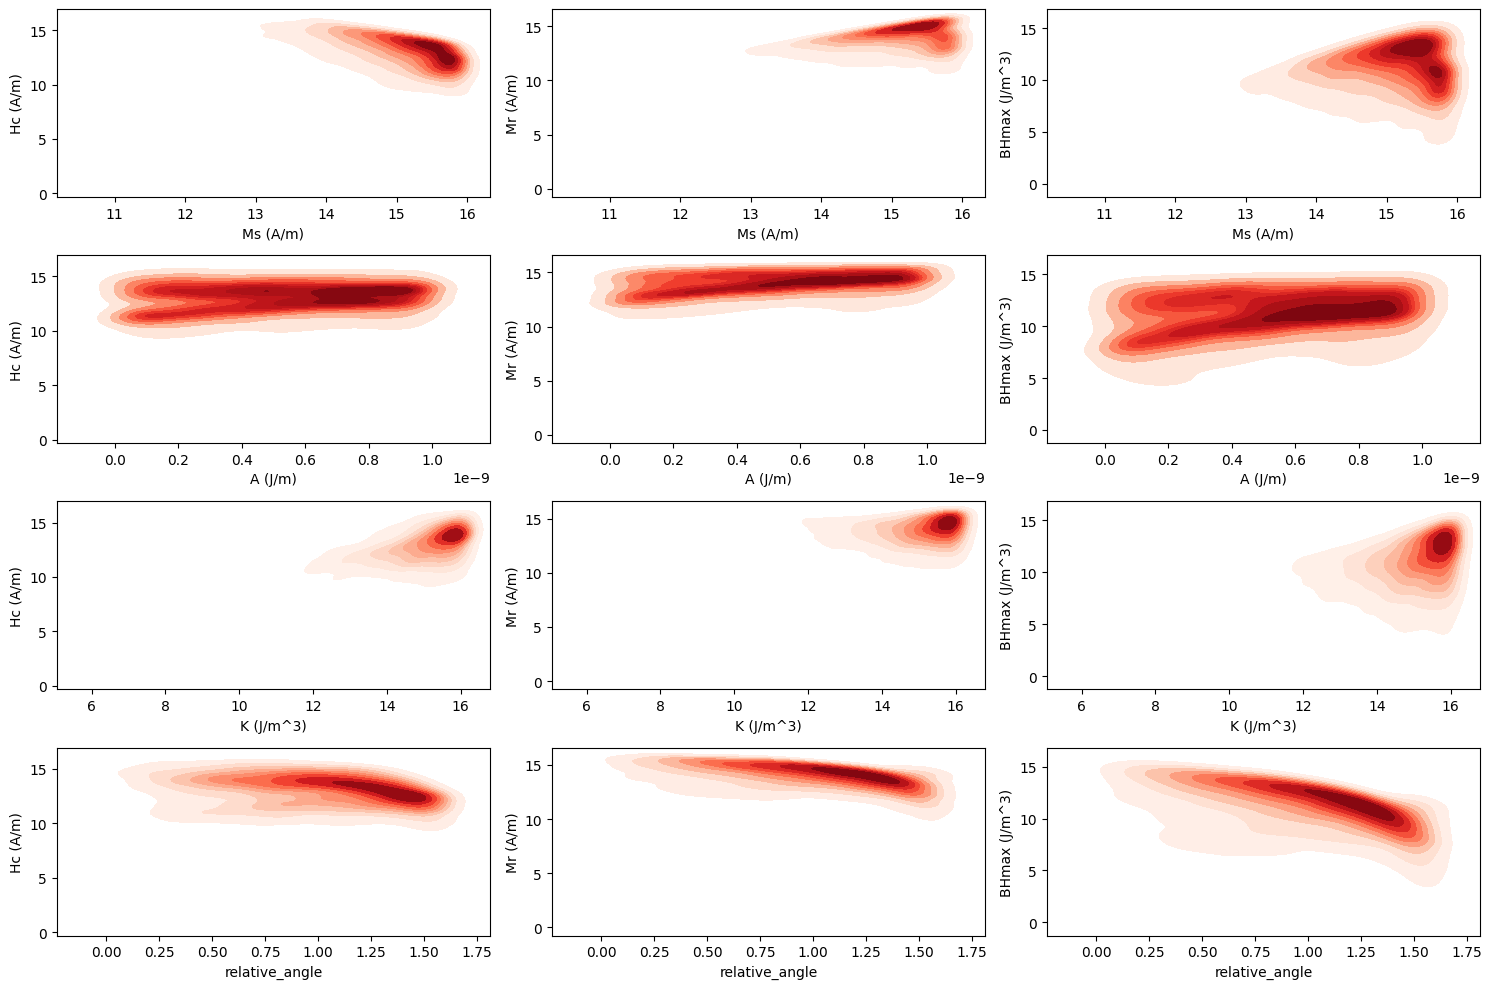

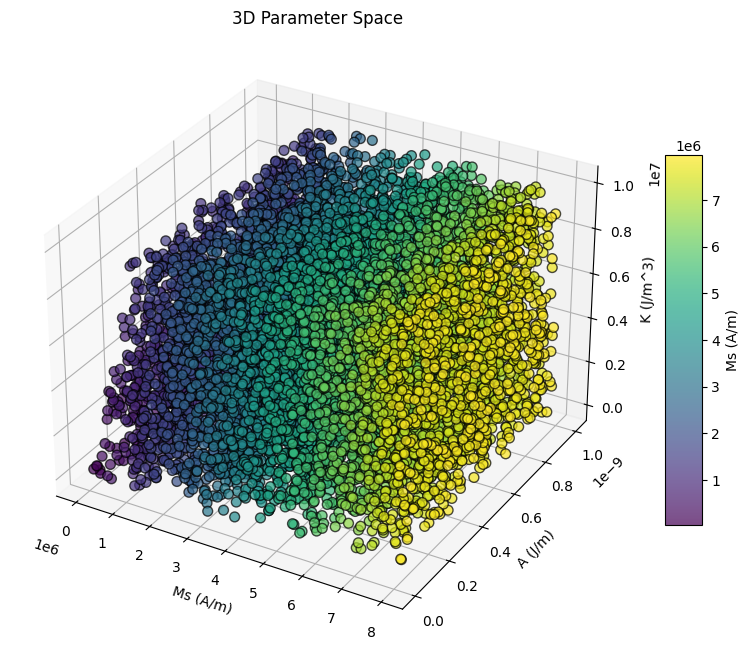


Analysis complete. Please check the plots directory for visualizations.


In [3]:
analyze_magnetic_data()

### Model training

In [4]:
from scripts.train_model import MLPipeline

Failed to import duecredit due to No module named 'duecredit'


In [5]:
configpath = 'config/ml_config_test.yaml'

In [6]:
pipeline = MLPipeline(configpath)


Loaded configurations:
{
  "LogTransformation": {
    "remove_negative": true,
    "convert_to_tesla": false,
    "apply_log_transform": true,
    "log_exclude_cols": [
      "relative_angle"
    ]
  }
}


       Ms (A/m)       A (J/m)     K (J/m^3)      Hc (A/m)      Mr (A/m)  \
0  6.369095e+06  6.915201e-10  1.250070e+06  2.427709e+05  1.496274e+06   
1  7.508412e+06  6.639665e-10  7.348260e+05  1.591135e+05  9.050180e+05   
2  1.508968e+06  3.365501e-10  9.418408e+06  3.221281e+06  5.214874e+05   
3  6.475838e+06  9.188104e-10  5.459821e+05  1.451171e+05  2.631304e+06   
4  7.259253e+06  3.189277e-10  5.170089e+06  8.746818e+04  3.253484e+05   

   BHmax (J/m^3)  relative_angle        calculator  \
0   55795.721896        1.557563  mumax3_MinDriver   
1   19129.603358        0.978500  mumax3_MinDriver   
2   34838.510487        1.217929  mumax3_MinDriver   
3  128853.092501        0.880977  mumax3_MinDriver   
4    4171.165412        1.421916  mumax3_MinDriver   

                                     file_path  
0   mumax_mindrive_data/data/output_157907_186  
1  mumax_mindrive_data/data/output_165319_1688  
2   mumax_mindrive_data/data/output_157882_867  
3  mumax_mindrive_data/data/

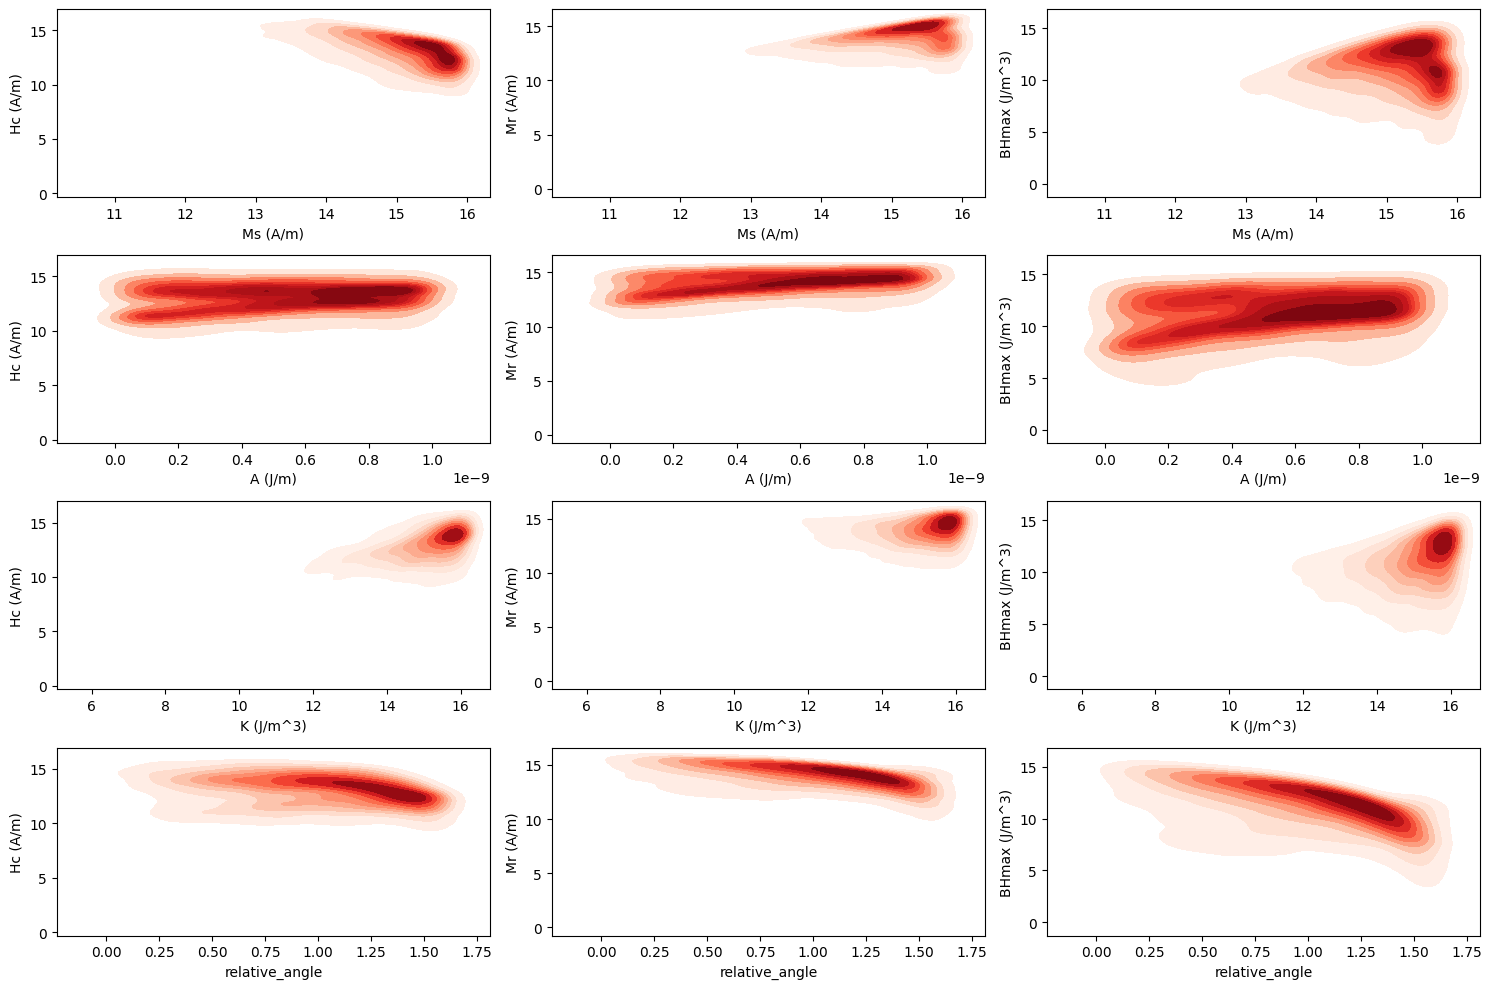

In [7]:
pipeline.run()

### Plot Metrics

In [ ]:
from scripts.plot_metrics import *

In [ ]:
results_dir = 'results/'

In [ ]:
output = 'results/metric_tables'

In [ ]:
# Set matplotlib style
plt.style.use('ggplot')

In [ ]:
# Set default output directory as a subdirectory of the input directory
results_path = Path(results_dir)
if output is None:
    output_path = results_path / "metric_tables"
else:
    output_path = Path(output)

In [ ]:
# Create output directory
output_path.mkdir(parents=True, exist_ok=True)

In [ ]:
# Load results
results = load_results(results_dir)

In [ ]:
# Create tables
create_metric_tables(results, output_path)
        
print(f"Tables and plots generated successfully in {output_path}")

Processing all data...
  Creating tables for dataset: LogTransformation_all_standard
    Saved overall metrics to results/metric_tables/LogTransformation_all_standard_overall_metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Overall_metrics.png
    Creating table for variable: Mr (A/m)
    Saved Mr (A/m) metrics to results/metric_tables/LogTransformation_all_standard_Mr__A_m__metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Mr__A_m__metrics.png
    Creating table for variable: BHmax (J/m^3)
    Saved BHmax (J/m^3) metrics to results/metric_tables/LogTransformation_all_standard_BHmax__J_m_3__metrics.html
    Saved metrics plot to results/metric_tables/LogTransformation_all_standard_BHmax__J_m_3__metrics.png
    Creating table for variable: Hc (A/m)
    Saved Hc (A/m) metrics to results/metric_tables/LogTransformation_all_standard_Hc__A_m__metrics.html
    Saved metrics plot to results/metric_tables/LogT